# DIGITAL IMAGE PROCESSING LAB 5

### 1. JPEG Compression

Steps:
1) Segement image into 8*8 Blocks
2) Subtract each block by 128
3) Take DCT
4) Apply Quantization, divide each block by Quantization Matrix
5) Round off
6) Apply deQuantization, Multily each block by Quantization Matrix
7) Take IDCT
8) Add each block by 128

##### This function accepts Image and Quantization Matix as inputs and returns Compressed Image

In [25]:
def Jpeg_compression(image, QuantizationMatrix):
    row, col = image.shape
    
    dct_image = np.zeros(row*col).reshape(row, col)
    Quantized_image = np.zeros(row*col).reshape(row, col)
    DeQuantized_image = np.zeros(row*col).reshape(row, col)
    idct_image = np.zeros(row*col).reshape(row, col)
    compressed_image = np.zeros(row*col).reshape(row, col)

    for i in range(0, row, 8):
        for j in range(0, col, 8):
            image[i:i+8, j:j+8] = image[i:i+8, j:j+8]-128
            dct_image[i:i+8, j:j+8] = dct(image[i:i+8, j:j+8]).astype(np.float32)
            Quantized_image[i:i+8, j:j+8] = np.around(dct_image[i:i+8, j:j+8]/QuantizationMatrix).astype(np.int32)
            DeQuantized_image[i:i+8, j:j+8] = Quantized_image[i:i+8, j:j+8]*QuantizationMatrix
            idct_image[i:i+8, j:j+8] = idct(DeQuantized_image[i:i+8, j:j+8])
            compressed_image[i:i+8, j:j+8] = idct_image[i:i+8, j:j+8]+128

    return compressed_image

##### Import Statements

In [26]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.fftpack import dct, idct
import math

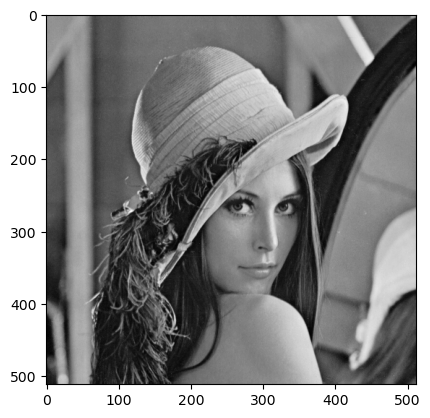

In [27]:
image = cv2.imread('/Users/rajeshr/Desktop/DIPLab5/lena_gray.bmp', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.show()

##### Defining Quantization Matrix: Q10, Q50 and Q90

In [28]:
Q50 = np.array([[16,11,10,16,24,40,51,61],
                [12,12,14,19,26,58,60,55],
                [14,13,16,24,40,57,69,56],
                [14,17,22,29,51,87,80,62],
                [18,22,37,56,68,109,103,77],
                [24,35,55,64,81,104,113,92],
                [49,64,78,87,103,121,120,101],
                [72,92,95,98,112,100,130,99]])

Q10 = np.array([[80,60,50,80,120,200,255,255],
                [55,60,70,95,130,255,255,255],
                [70,65,80,120,200,255,255,255],
                [70,85,110,145,255,255,255,255],
                [90,110,185,255,255,255,255,255],
                [120,175,255,255,255,255,255,255],
                [245,255,255,255,255,255,255,255],
                [255,255,255,255,255,255,255,255]])
Q90 = np.array([[3,2,2,3,5,8,10,12],
                [2,2,3,4,5,12,12,11],
                [3,3,3,5,8,11,14,11],
                [3,3,4,6,10,17,16,12],
                [4,4,7,11,14,22,21,15],
                [5,7,11,13,16,12,23,18],
                [10,13,16,17,21,24,24,21],
                [14,18,19,20,22,20,20,20]])

##### Passing input image & Quantization matrix and obtaining result

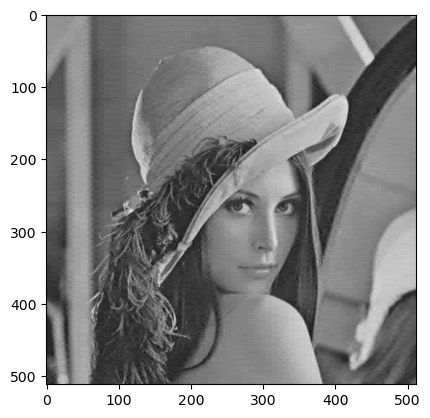

In [71]:
compressed_image = Jpeg_compression(image, Q10)
plt.imshow(compressed_image, cmap='gray')
plt.show()

### Calculation of PSNR

In [69]:
def PSNR(original, reconstructed):
    mse = np.mean((original - reconstructed) ** 2)
    if(mse == 0):
        return 100
    max_pixel = 255.0
    psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
    return abs(psnr)

In [70]:
psnr = PSNR(image, compressed_image)
print('PSNR = ', psnr)

PSNR =  19.440074166989493


### 2. Y, CB, CR of Color Image

Read an color image and apply Y, CB, CR

In [74]:
Colorimage = cv2.imread('/Users/rajeshr/Desktop/DIPLab5/balloon_3.jpg', cv2.COLOR_BGR2YCrCb)
Colorimage.shape

(375, 375, 3)

In [75]:
Y_plane = Colorimage[:,:,0]
Cr_Plane = Colorimage[:,:,1]
Cb_Plane = Colorimage[:,:,2]
Y_plane.shape

(375, 375)

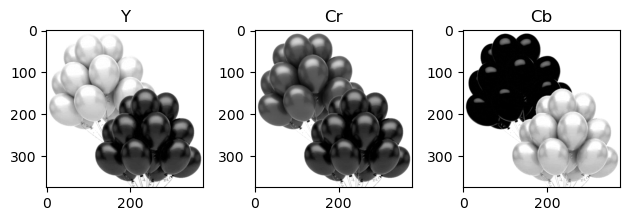

In [76]:
plt.subplot(1, 3, 1)
plt.title('Y')
plt.imshow(Y_plane, cmap='gray')
plt.subplot(1, 3, 2)
plt.title('Cr')
plt.imshow(Cr_Plane, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('Cb')
plt.imshow(Cb_Plane, cmap='gray')

plt.tight_layout()
plt.show()

##### Performing JPEG Compression for these planes

In [77]:
YCompress = Jpeg_compression(Y_plane, Q50)
CrCompress = Jpeg_compression(Cr_Plane, Q50)
CbCompress = Jpeg_compression(Cb_Plane, Q50)

plt.imshow(compressed_image, cmap='gray')
plt.show()

ValueError: operands could not be broadcast together with shapes (8,7) (8,8) 